In [1]:
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')                
tf.config.experimental.set_visible_devices(gpus[3], 'GPU')

In [3]:
import numpy as np
import pandas as pd
import glob
from tensorflow import keras
from tensorflow.keras import *
from PIL import *

In [4]:
glob.glob('C:/AIFactory/ETC/프로그래머스/train/*')[:5]

['C:/AIFactory/ETC/프로그래머스/train\\dog',
 'C:/AIFactory/ETC/프로그래머스/train\\elephant',
 'C:/AIFactory/ETC/프로그래머스/train\\giraffe',
 'C:/AIFactory/ETC/프로그래머스/train\\guitar',
 'C:/AIFactory/ETC/프로그래머스/train\\horse']

In [5]:
glob.glob('C:/AIFactory/ETC/프로그래머스/train/dog/*')[:5]

['C:/AIFactory/ETC/프로그래머스/train/dog\\pic_001.jpg',
 'C:/AIFactory/ETC/프로그래머스/train/dog\\pic_002.jpg',
 'C:/AIFactory/ETC/프로그래머스/train/dog\\pic_003.jpg',
 'C:/AIFactory/ETC/프로그래머스/train/dog\\pic_004.jpg',
 'C:/AIFactory/ETC/프로그래머스/train/dog\\pic_005.jpg']

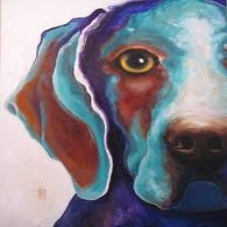

In [6]:
Image.open('C:/AIFactory/ETC/프로그래머스/train/dog\\pic_001.jpg')

In [7]:
train1 = pd.DataFrame({'path' : glob.glob('C:/AIFactory/ETC/프로그래머스/train/dog/*')})
train1['label'] = 'dog'
train2 = pd.DataFrame({'path' : glob.glob('C:/AIFactory/ETC/프로그래머스/train/elephant/*')})
train2['label'] = 'elephant'
train3 = pd.DataFrame({'path' : glob.glob('C:/AIFactory/ETC/프로그래머스/train/giraffe/*')})
train3['label'] = 'giraffe'
train4 = pd.DataFrame({'path' : glob.glob('C:/AIFactory/ETC/프로그래머스/train/guitar/*')})
train4['label'] = 'guitar'
train5 = pd.DataFrame({'path' : glob.glob('C:/AIFactory/ETC/프로그래머스/train/horse/*')})
train5['label'] = 'horse'

In [8]:
frame = [train1,train2,train3,train4,train5]
alldata = pd.concat(frame, axis = 0).reset_index(drop =True)

In [9]:
alldata

,path,label
0,C:/AIFactory/ETC/프로그래머스/train/dog\pic_001.jpg,dog
1,C:/AIFactory/ETC/프로그래머스/train/dog\pic_002.jpg,dog
2,C:/AIFactory/ETC/프로그래머스/train/dog\pic_003.jpg,dog
3,C:/AIFactory/ETC/프로그래머스/train/dog\pic_004.jpg,dog
4,C:/AIFactory/ETC/프로그래머스/train/dog\pic_005.jpg,dog
...,...,...
1049,C:/AIFactory/ETC/프로그래머스/train/horse\pic_169.jpg,horse
1050,C:/AIFactory/ETC/프로그래머스/train/horse\pic_170.jpg,horse
1051,C:/AIFactory/ETC/프로그래머스/train/horse\pic_171.jpg,horse
1052,C:/AIFactory/ETC/프로그래머스/train/horse\pic_172.jpg,horse


In [10]:
test = pd.DataFrame({'path' : glob.glob('C:/AIFactory/ETC/프로그래머스/test/0/*')})
test

,path
0,C:/AIFactory/ETC/프로그래머스/test/0\0001.jpg
1,C:/AIFactory/ETC/프로그래머스/test/0\0002.jpg
2,C:/AIFactory/ETC/프로그래머스/test/0\0003.jpg
3,C:/AIFactory/ETC/프로그래머스/test/0\0004.jpg
4,C:/AIFactory/ETC/프로그래머스/test/0\0005.jpg
...,...
345,C:/AIFactory/ETC/프로그래머스/test/0\0346.jpg
346,C:/AIFactory/ETC/프로그래머스/test/0\0347.jpg
347,C:/AIFactory/ETC/프로그래머스/test/0\0348.jpg
348,C:/AIFactory/ETC/프로그래머스/test/0\0349.jpg


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
from tensorflow.keras.layers import *
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.callbacks  import *
from sklearn.model_selection import StratifiedKFold

In [13]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)
result = 0

In [14]:
for train_index, valid_index in skf.split(alldata,alldata['label']):
    x_train = alldata.iloc[train_index]
    x_valid = alldata.iloc[valid_index]
    idg = ImageDataGenerator(horizontal_flip=True)
    idg2 = ImageDataGenerator()
    train_generator = idg.flow_from_dataframe(x_train, x_col = 'path', y_col = 'label', target_size = (300,300), batch_size = 8)
    valid_generator = idg2.flow_from_dataframe(x_valid, x_col = 'path', y_col = 'label', target_size = (300,300), batch_size = 8)
    es = EarlyStopping(patience = 3, restore_best_weights=True, verbose = 1)

    rl = ReduceLROnPlateau(patience = 2, factor = 0.2, verbose = 1)

    efn = EfficientNetB1(include_top = False, pooling = 'avg')

    model = Sequential()

    model.add(efn)
    model.add(Dense(5, activation = 'softmax'))
    model.compile(metrics = ['acc'], loss = 'categorical_crossentropy', optimizer = 'adam')

    model.fit(train_generator, validation_data = valid_generator, epochs = 10, callbacks = [es,rl])
    
    test_generator = idg2.flow_from_dataframe(test, x_col = 'path', y_col = None, target_size = (300,300), batch_size = 8, class_mode = None, shuffle = False) #얘도 안에다
    
    result += model.predict(test_generator, verbose = 1, workers=2) / 5

Found 843 validated image filenames belonging to 5 classes.
Found 211 validated image filenames belonging to 5 classes.
Epoch 1/10
106/106 [==============================] - 31s 182ms/step - loss: 0.9137 - acc: 0.6543 - val_loss: 0.7366 - val_acc: 0.8436
Epoch 2/10
106/106 [==============================] - 17s 157ms/step - loss: 0.4529 - acc: 0.8327 - val_loss: 0.8352 - val_acc: 0.7488
Epoch 3/10
106/106 [==============================] - 17s 156ms/step - loss: 0.3509 - acc: 0.8798 - val_loss: 0.4033 - val_acc: 0.8578
Epoch 4/10
106/106 [==============================] - 16s 156ms/step - loss: 0.2144 - acc: 0.9375 - val_loss: 0.7877 - val_acc: 0.7915
Epoch 5/10
106/106 [==============================] - 17s 157ms/step - loss: 0.3068 - acc: 0.8902 - val_loss: 0.6417 - val_acc: 0.7915

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 6/10
106/106 [==============================] - 17s 156ms/step - loss: 0.1451 - acc: 0.9537 - val_loss: 0.1745 - val_

Found 350 validated image filenames.
44/44 [==============================] - 2s 26ms/step


In [15]:
train_generator.class_indices

{'dog': 0, 'elephant': 1, 'giraffe': 2, 'guitar': 3, 'horse': 4}

In [16]:
sub = pd.read_csv('test_answer_sample_.csv')

In [17]:
 np.argmax(result,axis = 1)

array([0, 3, 3, 0, 3, 3, 4, 0, 3, 1, 0, 2, 0, 2, 3, 1, 2, 0, 2, 3, 3, 3,
       2, 3, 0, 2, 1, 2, 0, 3, 1, 2, 0, 2, 0, 2, 3, 4, 2, 1, 4, 0, 2, 3,
       1, 3, 0, 3, 1, 2, 4, 1, 4, 1, 2, 0, 4, 3, 1, 0, 3, 0, 1, 1, 1, 2,
       4, 1, 1, 3, 1, 3, 0, 1, 1, 0, 2, 0, 3, 4, 1, 0, 1, 0, 4, 4, 3, 0,
       1, 2, 2, 3, 1, 0, 3, 4, 3, 3, 1, 0, 3, 0, 0, 2, 3, 2, 3, 3, 0, 0,
       4, 0, 2, 3, 4, 2, 0, 0, 3, 0, 4, 2, 2, 1, 4, 1, 3, 0, 0, 4, 1, 1,
       0, 4, 4, 2, 0, 3, 2, 0, 4, 3, 1, 3, 1, 1, 4, 0, 2, 1, 4, 1, 0, 3,
       3, 2, 0, 1, 4, 1, 2, 4, 2, 0, 3, 4, 1, 0, 0, 2, 1, 3, 3, 1, 0, 3,
       2, 3, 3, 4, 2, 0, 3, 1, 0, 3, 3, 2, 0, 4, 4, 2, 2, 0, 4, 0, 0, 2,
       3, 2, 0, 4, 4, 0, 2, 1, 3, 3, 0, 2, 3, 1, 1, 3, 1, 3, 2, 2, 0, 0,
       0, 1, 0, 2, 1, 4, 3, 2, 3, 4, 3, 3, 0, 0, 4, 0, 0, 4, 4, 1, 4, 1,
       2, 1, 1, 0, 4, 4, 4, 3, 4, 2, 3, 3, 1, 4, 2, 3, 4, 0, 0, 0, 2, 0,
       1, 4, 1, 4, 0, 1, 1, 3, 1, 4, 0, 2, 4, 4, 3, 1, 0, 1, 0, 3, 3, 3,
       0, 0, 3, 2, 0, 3, 2, 0, 0, 0, 2, 1, 3, 1, 3,

In [18]:
sub['answer value'] = np.argmax(result,axis = 1)

In [19]:
sub.to_csv('sub.csv',index= False)

In [20]:
sub

,Unnamed: 0,answer value
0,0,0
1,1,3
2,2,3
3,3,0
4,4,3
...,...,...
345,345,0
346,346,3
347,347,3
348,348,0
